<a href="https://colab.research.google.com/github/seewol/DataAnalysis/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_7%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오픈소스 기반 데이터 분석 7강 - 데이터 전처리 2

### 7-1 데이터 결측치 찾기

In [25]:
import pandas as pd
import numpy as np

data = {'이름': ['김철수', '이영희', '박민수', '최지훈', '정소희'],
        '나이': [25, 30, np.nan, 22, 35],
        '도시': ['서울', None, '인천', '서울', '대전'],
        '점수': [90, 85, np.nan, 80, 92]}

df = pd.DataFrame(data)

## 결측치 여부 확인
df.isnull()
df.isna() # NumPy (isnull()과 동일)

## 열별, 행별 결측치 개수 확인
df.isnull().sum() # sum()은 열별로 개수
df.isnull().sum(axis = 1) # axis = 1 은 행별로 개수

## 특정 열, 행 결측치 확인
df[df.isnull().any(axis=1)] # 행별로 결측치가 있으면 나오도록
df[df['나이'].isnull()]
# df 안에서, 특정 조건(True인 행)만 뽑아서 다시 df로 보여주는 것 (필터링)

## 결측치가 아닌 항목 확인
df.notnull() # 결측치가 없으면 True

## 결측치 비율
print(df)
print(df.isnull())
# 전체 비율 계산 → (결측치 개수 / 전체 셀 개수) * 100
df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100

# ▼ 결측치 비율 코드 해석
# df.isnull() : True/False로 결측치 여부 표시
# .sum() : True를 1로 보고 열별로 합계(결측치 개수) 계산
# .sum() : 위 결과(열별 결측치 개수)를 한 번 더 더해, 전체 결측치 총 개수 계산
# (df.shape[0] * df.shape[1]) : 전체 셀 개수, df.shape[0] : 행 / df.shape[1] : 열


    이름    나이    도시    점수
0  김철수  25.0    서울  90.0
1  이영희  30.0  None  85.0
2  박민수   NaN    인천   NaN
3  최지훈  22.0    서울  80.0
4  정소희  35.0    대전  92.0
      이름     나이     도시     점수
0  False  False  False  False
1  False  False   True  False
2  False   True  False   True
3  False  False  False  False
4  False  False  False  False


np.float64(15.0)

### 7-2 데이터 시각화를 이용한 결측치 찾기

In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

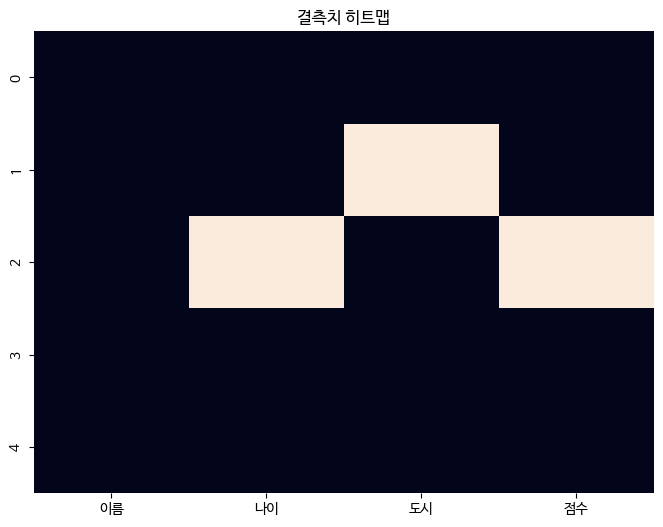

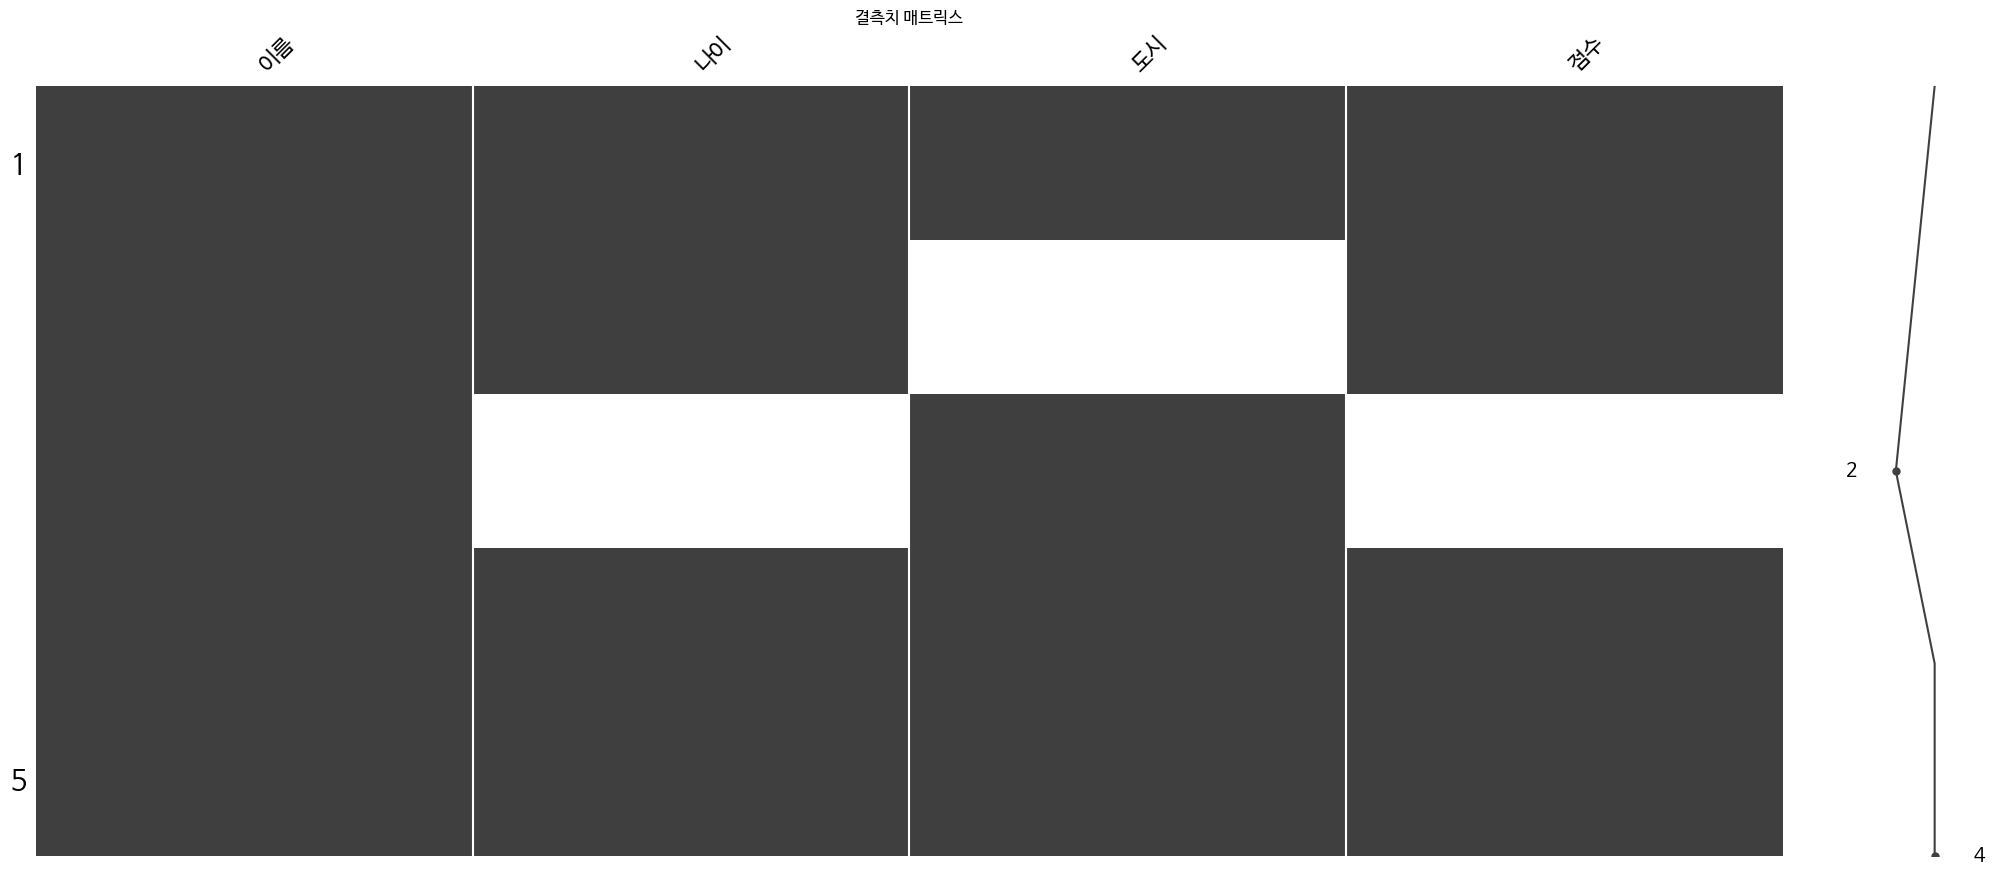

In [3]:
import numpy as np
import pandas as pd

### 시각화 라이브러리 임포트
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

data = {'이름': ['김철수', '이영희', '박민수', '최지훈', '정소희'],
        '나이': [25, 30, np.nan, 22, 35],
        '도시': ['서울', None, '인천', '서울', '대전'],
        '점수': [90, 85, np.nan, 80, 92]}
df = pd.DataFrame(data)

### 결측치 히트맵
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("결측치 히트맵")
plt.show()

### 결측치 매트릭스
msno.matrix(df)
plt.title("결측치 매트릭스")
plt.show()

### 7-3 사분위 범위를 통한 이상치 찾기

In [4]:
import pandas as pd
import numpy as np

점수_데이터 = [72, 68, 75, 282, 64, 31, 78, 69, 88, 92, 22, 84, 61, -90, 130, 66]
학번_데이터 = list(range(1001, 1001 + len(점수_데이터)))

df = pd.DataFrame({
    '학번': 학번_데이터,
    '점수': 점수_데이터
})

### 사분위 범위 경계값 계산
q1 = df['점수'].quantile(0.25)
q3 = df['점수'].quantile(0.75)
iqr = q3 - q1 # q1과 q3사이의 값
하한값 = q1 - 1.5 * iqr # 하한값보다 작으면 이상치
상한값 = q3 + 1.5 * iqr # 상한값보다 크면 이상치

### IQR 통계량 출력
print(q1)
print(q3)
print(iqr)
print(하한값) # 30.625 : 이보다 작으면 이상치로 파악
print(상한값) # 117.625 : 이보다 크면 이상치로 파악


63.25
85.0
21.75
30.625
117.625


### 7-4 Z-점수를 통한 이상치 찾기

In [10]:
import pandas as pd
import numpy as np

점수_데이터 = [72, 68, 75, 282, 64, 31, 78, 69, 88, 92, 22, 84, 61, -90, 130, 66]
학번_데이터 = list(range(1001, 1001 + len(점수_데이터)))

df = pd.DataFrame({
    '학번': 학번_데이터,
    '점수': 점수_데이터
})

### Z-점수 계산 (z-score)
점수_평균 = df['점수'].mean()
점수_표준편차 = df['점수'].std()

df['점수_Z'] = (df['점수'] - 점수_평균) / 점수_표준편차 # (각 점수 - 평균) / 표준편차
df

### 임계값 설정 및 이상치 여부 판단
임계값 = 2 # z-score가 2 넘어가면 이상
df['이상치여부'] = df['점수_Z'].abs() > 임계값 # ±2 여부로 절대값
# 새로운 컬럼 생성 후, '이상치여부'라고 네이밍

### 이상치 데이터 출력
df[df['이상치여부']]
# └ df[df['이상치여부'] == True] 와 동일
# ★ Boolean Indexing : df[...] 안의 True 위치만 골라내는 인덱싱
# df 안에서, 특정 조건(True인 행)만 뽑아서 다시 df로 보여주는 것 (필터링)

### 이상치 비율 출력
df['이상치여부'].mean() * 100
# boolean이 컴퓨터 내부에서 True는 1, False는 0
# mean()으로 평균값 구하고 100 곱하면 비율


np.float64(12.5)

### 7-5 평균값 및 선형보간법을 통한 결측치 처리

In [16]:
import pandas as pd
import numpy as np

file_path = "raw_large_shopping_customer.csv"
df = pd.read_csv(file_path)
print(df.isnull().sum()) # 위 csv 파일의 결측치 개수

# dropna() : 결측치(NaN)가 있는 행이나 열을 제거하는 함수

df_cleaned = df.dropna(thresh = df.shape[1] - 1)
# thresh 임계점 : 최소 이만큼은 NaN이 아닌 값(정상값)이 있어야 남겨두라는 옵션
# shape[1] : 열(컬럼) 개수

# 즉, 칼럼 개수 : 5개 → 4개 이상 값이 채워져있는 것만 남기자.

# 최소 4개의 값이 채워져있는 행만 남기고
# 결측치가 2개 이상인 행은 drop

### 나이, 소득 평균값 대치 및 결과 출력
df_cleaned.loc[:, ['나이', '소득']] = df_cleaned[['나이', '소득']].fillna(df_cleaned[['나이', '소득']].mean())
# fillna() : null 값이 있는 것들을 채우는 함수
# df.loc[행선택 : 열선택] → loc[:]은 모든 행을 선택한다는 뜻

### 지출, 평균구매횟수 선형보간법 적용
df_cleaned.loc[:, ['지출', '평균구매횟수']] = df_cleaned[['지출', '평균구매횟수']].interpolate(method='linear')

df_cleaned.to_csv("cleaned_large_shopping_customer.csv", index=False, encoding="utf-8-sig")

ID         0
나이        50
소득        50
지출        50
평균구매횟수    50
dtype: int64


### 7-6 DataFrame 값 변경

In [38]:
import pandas as pd

data = {'age': [25, 30, None, 22, 35],
        'city': ['Seoul', None, 'Incheon', 'Seoul', 'Daejeon'],
        'score': [90, 85, None, 80, 92]}
df = pd.DataFrame(data)

### replace를 이용한 Seoul -> 서울
df['city'] = df['city'].replace('Seoul', '서울')

### replace를 이용한 None -> 미정, Incheon -> 인천
df['city'] = df['city'].replace({None : '미정', 'Incheon' : '인천'})
# 여러 값 변경 : 튜플이 아닌 딕셔너리로 변경 전:후 쌍을 나열

### map을 이용한 값 변경 (딕셔너리)
df = pd.DataFrame(data)
city_map = {'Seoul': '서울특별시', None: '미정', 'Incheon':'인천광역시', 'Daejeon':'대전광역시'}
df['city'] = df['city'].map(city_map)

### map을 이용한 값 변경 (함수)
df['age_str'] = df['age'].map(lambda x : f"{x}살" if pd.notna(x) else '알수없음')
# lambda 함수 x에는 컬럼의 값들이 들어감
# notna() ↔ isna()

### apply 함수를 이용한 값 변경
df['age_apply'] = df['age'].apply(lambda x : x*2 if pd.notna(x) else None)
print("\napply 함수를 이용한 값 변경 :\n", df['age_apply'])

### apply 함수를 이용한 행단위 값 변경
def age_plus_score(row) :
  age = row['age'] if pd.notna(row['age']) else 0
  score = row ['score'] if pd.notna(row['score']) else 0
  return age + score
df['age_plus_score'] = df.apply(age_plus_score, axis=1) # 행별로
print("\napply 함수를 이용한 행단위 값 변경 :\n", df['age_plus_score'])

### loc 인덱스를 이용한 값 변경
df.loc[df['score'] < 90, 'score'] = 90
print("\n점수가 90점 미만인 사람은 90점으로 변경 :\n", df)

### where 함수를 이용한 값 변경
df['age_where'] = df['age'].where(df['age'] >= 30, other = 0)
# 조건에 해당하지 않는 값은 모두 other = 0으로 변경
print("\n점수가 30 이상 값만 유지, 나머지는 0 변경 :\n", df['age_where'])




apply 함수를 이용한 값 변경 :
 0    50.0
1    60.0
2     NaN
3    44.0
4    70.0
Name: age_apply, dtype: float64

apply 함수를 이용한 행단위 값 변경 :
 0    115.0
1    115.0
2      0.0
3    102.0
4    127.0
Name: age_plus_score, dtype: float64

점수가 90점 미만인 사람은 90점으로 변경 :
     age   city  score age_str  age_apply  age_plus_score
0  25.0  서울특별시   90.0   25.0살       50.0           115.0
1  30.0     미정   90.0   30.0살       60.0           115.0
2   NaN  인천광역시    NaN    알수없음        NaN             0.0
3  22.0  서울특별시   90.0   22.0살       44.0           102.0
4  35.0  대전광역시   92.0   35.0살       70.0           127.0

점수가 30 이상 값만 유지, 나머지는 0 변경 :
 0     0.0
1    30.0
2     0.0
3     0.0
4    35.0
Name: age_where, dtype: float64


### 7-7 날짜 데이터 타입 다루기


In [58]:
date_str = ['2025-07-01', '2025-08-01', '2025-09-01']
df_date = pd.DataFrame({'date_str':date_str})

### datetime 타입 변환
df_date['date'] = pd.to_datetime(df_date['date_str'])
# df_date.info()

### 날짜 데이터 분리
df_date['date'].dt.year
df_date['date'].dt.month
df_date['date'].dt.day
df_date['date'].dt.day_name()

### 날짜 데이터 포멧 변경
df_date['date_formatted'] = df_date['date'].dt.strftime('%Y/%m/%d')
df_date['date_ymd'] = df_date['date'].dt.strftime('%Y년 %m월 %d일')
df_date['date_dmy'] = df_date['date'].dt.strftime('%d-%m-%Y')
df_date['date_weekday'] = df_date['date'].dt.strftime('%A, %Y-%m-%d')

df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date_str        3 non-null      object        
 1   date            3 non-null      datetime64[ns]
 2   date_formatted  3 non-null      object        
 3   date_ymd        3 non-null      object        
 4   date_dmy        3 non-null      object        
 5   date_weekday    3 non-null      object        
dtypes: datetime64[ns](1), object(5)
memory usage: 276.0+ bytes


## 7-8 실습 시나리오 - 데이터 정제

### [재수행] 6-5 실습 시나리오 - Kaggle을 활용한 데이터 수집 및 측정

In [59]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jeeeunpark","key":"b9af29ad4b313a88d61e819bc4ce1500"}'}

In [60]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [61]:
!kaggle competitions download -c store-sales-time-series-forecasting
!unzip store-sales-time-series-forecasting.zip

  0% 0.00/21.4M [00:00<?, ?B/s]
100% 21.4M/21.4M [00:00<00:00, 720MB/s]
Archive:  store-sales-time-series-forecasting.zip
  inflating: holidays_events.csv     
  inflating: oil.csv                 
  inflating: sample_submission.csv   
  inflating: stores.csv              
  inflating: test.csv                
  inflating: train.csv               
  inflating: transactions.csv        


### 데이터 분포 시각화

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(train['sales'], bins=50)
plt.title("판매량 분포")
plt.xlabel("판매량")
plt.ylabel("빈도")
plt.xlim(0, 5000)
plt.show()

store_sales = train.groupby('store_nbr')['sales'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='store_nbr', y='sales', data=store_sales)
plt.title("매장별 평균 판매량")
plt.xlabel("매장 번호")
plt.ylabel("평균 판매량")
plt.xticks(rotation=90)
plt.show()

In [75]:
import pandas as pd

train = pd.read_csv('train.csv')
stores = pd.read_csv('stores.csv')
transactions = pd.read_csv('transactions.csv')
oil = pd.read_csv('oil.csv')
holidays_events = pd.read_csv('holidays_events.csv')

### 결측치 처리

In [76]:
## 판매, 매장, 거래, 원유, 휴일이벤트 데이터 결측치
print(train.isnull().sum(), '\n')
print(stores.isnull().sum(), '\n')
print(transactions.isnull().sum(), '\n')
print(oil.isnull().sum(), '\n')
print(holidays_events.isnull().sum())

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64 

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64 

date            0
store_nbr       0
transactions    0
dtype: int64 

date           0
dcoilwtico    43
dtype: int64 

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64


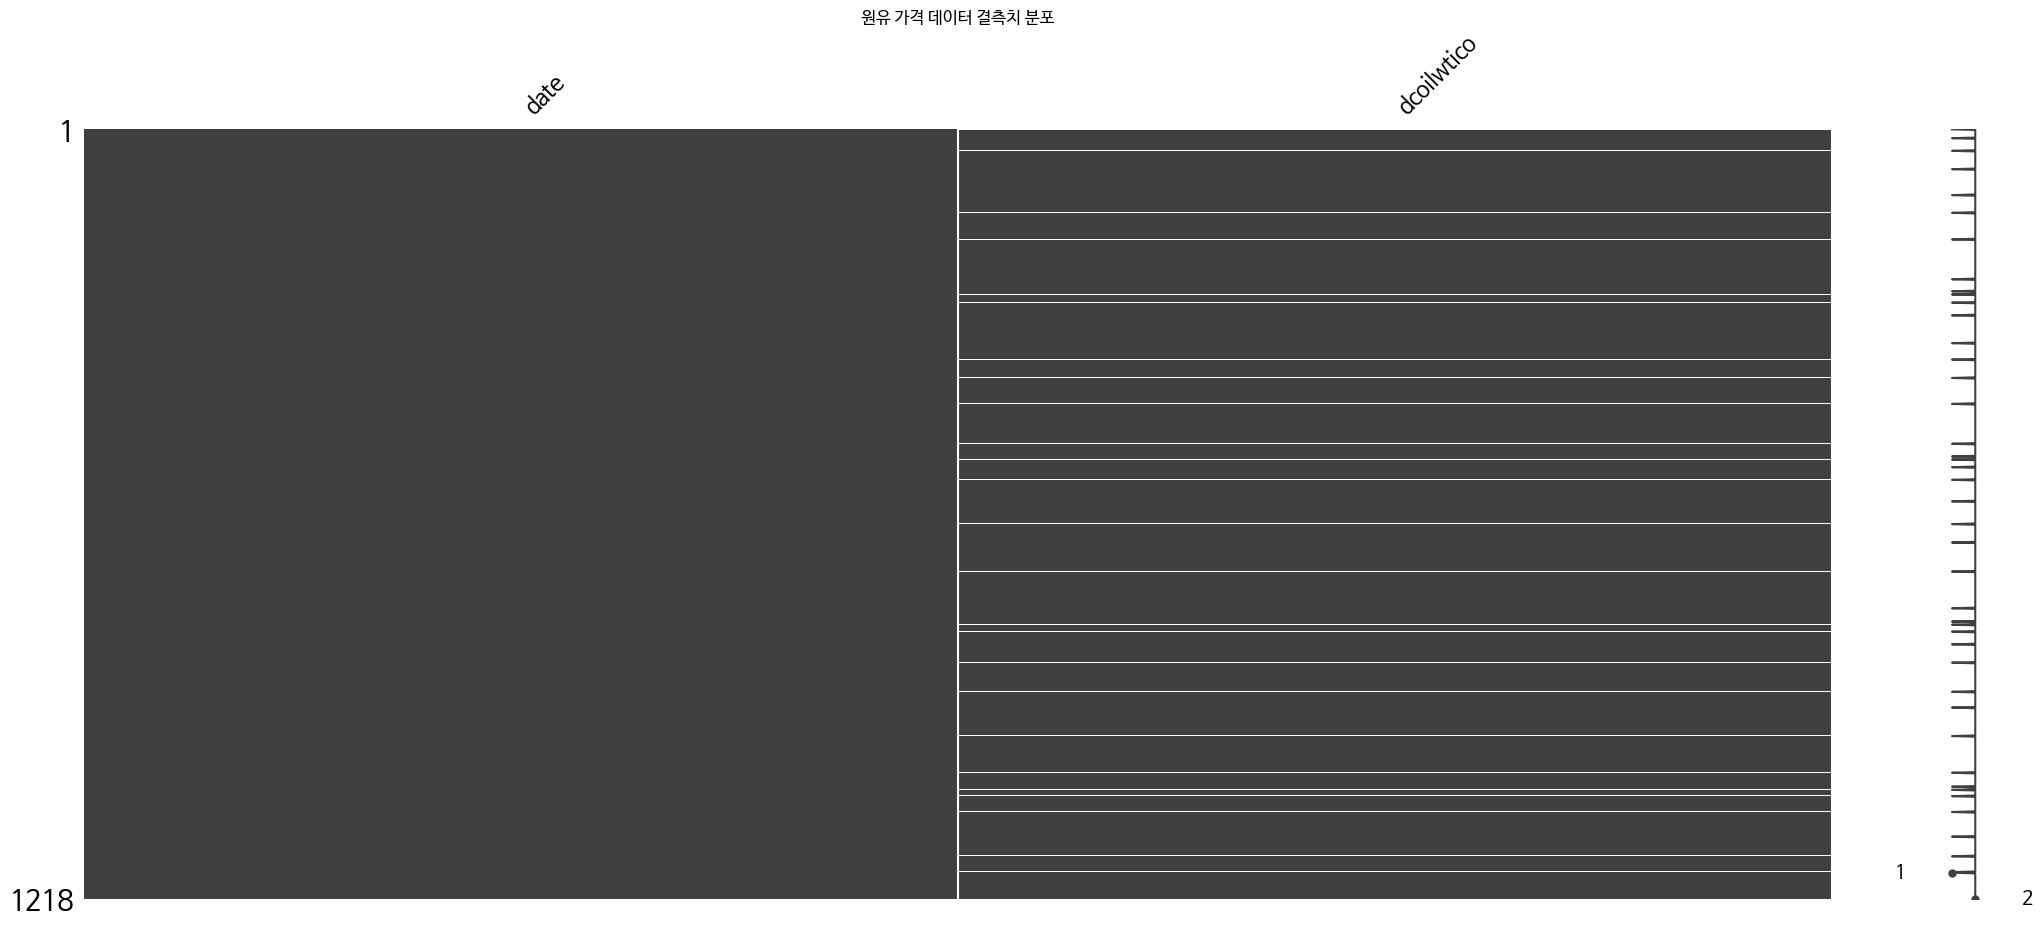

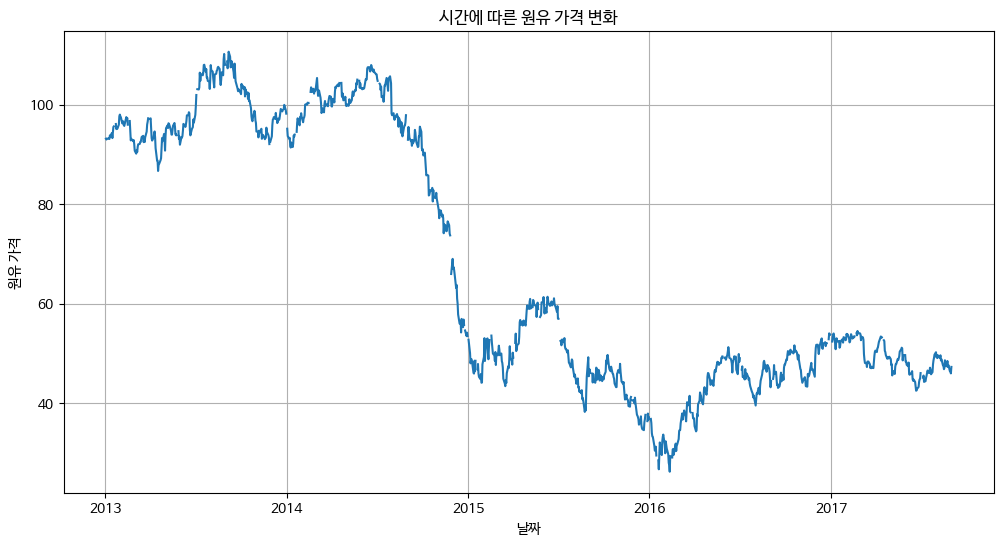

In [77]:
import missingno as msno

msno.matrix(oil)
plt.title("원유 가격 데이터 결측치 분포")
plt.show()

oil['date'] = pd.to_datetime(oil['date'])
plt.figure(figsize=(12, 6))
plt.plot(oil['date'], oil['dcoilwtico'])
plt.title("시간에 따른 원유 가격 변화")
plt.xlabel("날짜")
plt.ylabel("원유 가격")
plt.grid(True)
plt.show()

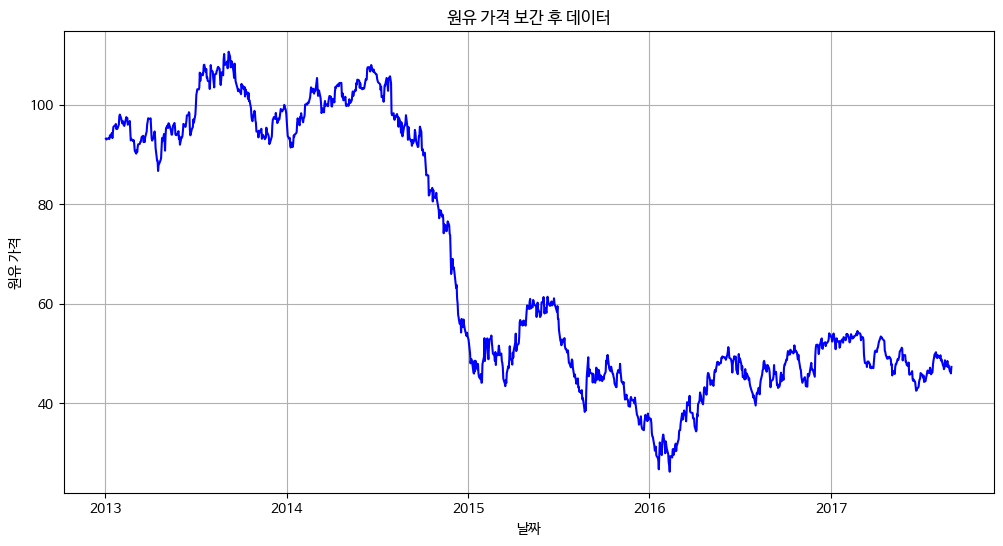

In [79]:
oil_cleaned = oil.copy()

# 원유 가격은 시간 순에 따라 나타나있어, 선형 보간법을 쓸 수 있다.

### 선형 보간법 적용한 원유 가격 데이터
oil_cleaned['dcoilwtico'] = oil_cleaned['dcoilwtico'].interpolate(method = 'linear')

plt.figure(figsize=(12, 6))
plt.plot(oil_cleaned['date'], oil_cleaned['dcoilwtico'], 'b-')
plt.title("원유 가격 보간 후 데이터")
plt.xlabel("날짜")
plt.ylabel("원유 가격")
plt.grid(True)
plt.show()

### 이상치 처리

이상치 개수: 200,274건
전체 대비 비율: 6.67%


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


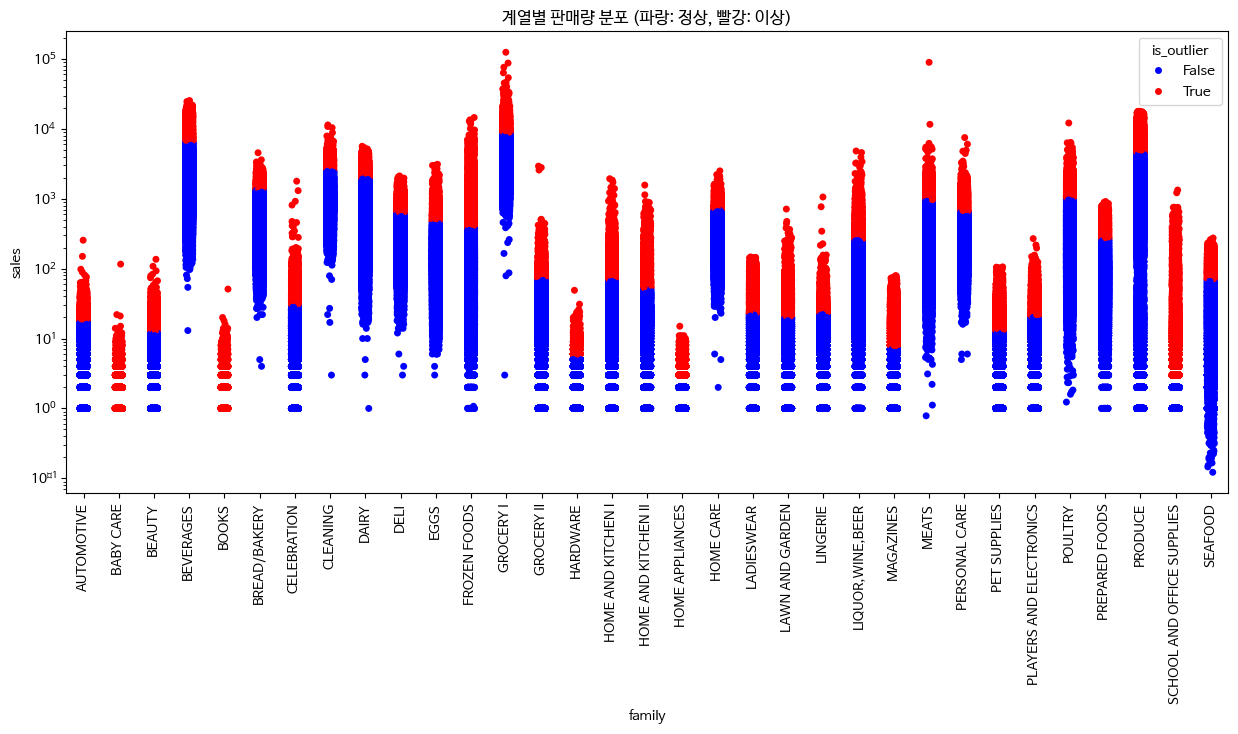

In [82]:
### 제품 계열별 판매 데이터 IQR 계산
# 물품 그룹
family_bounds = train.groupby('family')['sales'].apply(
    lambda x : x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25))
)

### 사분위 범위 경계값 계산
# q1 = df['점수'].quantile(0.25)
# q3 = df['점수'].quantile(0.75)
# iqr = q3 - q1 # q1과 q3사이의 값
# 하한값 = q1 - 1.5 * iqr # 하한값보다 작으면 이상치
# 상한값 = q3 + 1.5 * iqr # 상한값보다 크면 이상치

### 상한값 초과 판매량 이상치 분류
train_enhanced = train.copy()
train_enhanced['upper_bound'] = train_enhanced['family'].map(family_bounds)
train_enhanced['is_outlier'] = train_enhanced['sales'] > train_enhanced['upper_bound']

total_outliers = train_enhanced['is_outlier'].sum()
total_ratio = train_enhanced['is_outlier'].mean()

print(f"이상치 개수: {total_outliers:,}건")
print(f"전체 대비 비율: {total_ratio:.2%}")

plt.figure(figsize=(15,6))
sns.stripplot(x='family', y='sales', hue=train_enhanced['is_outlier'],
              data=train_enhanced, palette={False:'blue', True:'red'})
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('계열별 판매량 분포 (파랑: 정상, 빨강: 이상)')
plt.show()

In [89]:
### 판매량이 상한값 초과 시, 판매량으로 상한값으로 대체
train_cleaned = train.copy()
train_cleaned.loc[train_enhanced['is_outlier'], 'sales'] = \
    train_enhanced.loc[train_enhanced['is_outlier'], 'upper_bound']

changed_count = (train['sales'] != train_cleaned ['sales']).sum()
print(f"대체된 데이터 수: {changed_count}건")

대체된 데이터 수: 200274건


### 날짜 데이터 처리

In [93]:
### 판매, 거래, 휴일 이벤트, 원율 데이터 내 date 컬럼 데이터 datetime 데이터 타입으로 변경
train_cleaned['date'] = pd.to_datetime(train_cleaned['date'])
transactions['date'] = pd.to_datetime(transactions['date'])
holidays_events['date'] = pd.to_datetime(holidays_events['date'])
oil['date'] = pd.to_datetime(oil['date'])

train_cleaned['year'] = train_cleaned['date'].dt.year
train_cleaned['month'] = train_cleaned['date'].dt.month
train_cleaned['day'] = train_cleaned['date'].dt.day
train_cleaned['dayofweek'] = train_cleaned['date'].dt.dayofweek

### 주말, 월초, 월말 여부 판단
train_cleaned['weekend'] = train_cleaned['dayofweek'].apply(lambda x : 1 if x >= 5 else 0)
# 월, 화, 수, 목, 금 5 이상인 경우를 주말로
train_cleaned['is_month_start'] = train_cleaned['date'].dt.is_month_start
train_cleaned['is_month_end'] = train_cleaned['date'].dt.is_month_end

print("날짜 특성 추출 결과:")
print(train_cleaned[['date', 'year', 'month', 'day', 'dayofweek', 'weekend', 'is_month_start', 'is_month_end']].head())

날짜 특성 추출 결과:
        date  year  month  day  dayofweek  weekend  is_month_start  \
0 2013-01-01  2013      1    1          1        0            True   
1 2013-01-01  2013      1    1          1        0            True   
2 2013-01-01  2013      1    1          1        0            True   
3 2013-01-01  2013      1    1          1        0            True   
4 2013-01-01  2013      1    1          1        0            True   

   is_month_end  
0         False  
1         False  
2         False  
3         False  
4         False  


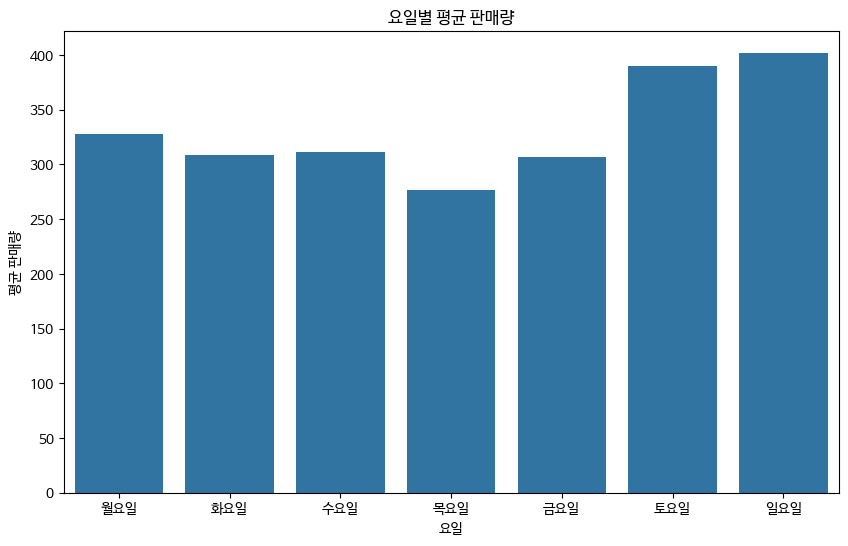

In [95]:
## 요일별 평균 판매량을 계산
day_sales = train_cleaned.groupby('dayofweek')['sales'].mean().reset_index()

## 요일 출력값 변경
day_sales['day_name'] = day_sales['dayofweek'].map({
    0 : '월요일', 1 : '화요일', 2 : '수요일', 3 : '목요일',
    4 : '금요일', 5 : '토요일', 6 : '일요일'
})

plt.figure(figsize=(10, 6))
sns.barplot(x='day_name', y='sales', data=day_sales)
plt.title("요일별 평균 판매량")
plt.xlabel("요일")
plt.ylabel("평균 판매량")
plt.show()

### 데이터 통합

In [101]:
## 판매, 거래 데이터 통합
train_with_trans = pd.merge(
  train_cleaned, transactions, # merge()는 두 개의 데이터 프레임 합침
  on = ['date', 'store_nbr'], # date와 store_nbr의 값이 같을 때 같은 행에 나열되도록.
  how = 'left' # 일종의 join
)

## 매장 데이터 통합
train_with_store = pd.merge(
    train_with_trans, stores,
    on = ['store_nbr'],
    how = 'left'
)

## 원유 데이터 통합
train_final = pd.merge(
    train_with_store, oil_cleaned,
    on = 'date', # 통합되는 키(중심) 값
    how = 'left'
)

print(train_final.isnull())

print("최종 데이터셋 정보:")
print(f"행 개수: {train_final.shape[0]}, 열 개수: {train_final.shape[1]}")
print(train_final.columns.tolist())
print(train_final.head())

            id   date  store_nbr  family  sales  onpromotion   year  month  \
0        False  False      False   False  False        False  False  False   
1        False  False      False   False  False        False  False  False   
2        False  False      False   False  False        False  False  False   
3        False  False      False   False  False        False  False  False   
4        False  False      False   False  False        False  False  False   
...        ...    ...        ...     ...    ...          ...    ...    ...   
3000883  False  False      False   False  False        False  False  False   
3000884  False  False      False   False  False        False  False  False   
3000885  False  False      False   False  False        False  False  False   
3000886  False  False      False   False  False        False  False  False   
3000887  False  False      False   False  False        False  False  False   

           day  dayofweek  weekend  is_month_start  is_month_en